**Problem statement: To find comforting, reliable, and cheap houses for our travelling clients**

In [1]:
# import necessary libararies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set()

In [2]:
# load dataset 
airb = pd.read_csv('Desktop/Airbnb_Open_Data.csv')

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
airb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
# filtering the needed columns
airbnb = airb[['host id', 'host_identity_verified', 'neighbourhood group', 'neighbourhood', 
               'instant_bookable', 'cancellation_policy', 
  'room type', 'Construction year', 'price', 'minimum nights', 
  'number of reviews', 'last review', 'availability 365', 'house_rules']]

In [6]:
airbnb.head()

,host id,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,minimum nights,number of reviews,last review,availability 365,house_rules
0,80014485718,unconfirmed,Brooklyn,Kensington,False,strict,Private room,2020.0,$966,10.0,9.0,10/19/2021,286.0,Clean up and treat the home the way you'd like...
1,52335172823,verified,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,$142,30.0,45.0,5/21/2022,228.0,Pet friendly but please confirm with me if the...
2,78829239556,NaN,Manhattan,Harlem,True,flexible,Private room,2005.0,$620,3.0,0.0,NaN,352.0,"I encourage you to use my kitchen, cooking and..."
3,85098326012,unconfirmed,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,$368,30.0,270.0,7/5/2019,322.0,NaN
4,92037596077,verified,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,$204,10.0,9.0,11/19/2018,289.0,"Please no smoking in the house, porch or on th..."


In [7]:
# checking general info 
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   host id                 102599 non-null  int64  
 1   host_identity_verified  102310 non-null  object 
 2   neighbourhood group     102570 non-null  object 
 3   neighbourhood           102583 non-null  object 
 4   instant_bookable        102494 non-null  object 
 5   cancellation_policy     102523 non-null  object 
 6   room type               102599 non-null  object 
 7   Construction year       102385 non-null  float64
 8   price                   102352 non-null  object 
 9   minimum nights          102190 non-null  float64
 10  number of reviews       102416 non-null  float64
 11  last review             86706 non-null   object 
 12  availability 365        102151 non-null  float64
 13  house_rules             50468 non-null   object 
dtypes: float64(4), int64

In [8]:
# changing certain variable to correct datatype 
airbnb['host id'] = airbnb['host id'].astype('object')

<ipython-input-8-bd7482d8a22d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['host id'] = airbnb['host id'].astype('object')


In [9]:
# strip the '$'' sign in the price column 
airbnb['price'] = airbnb['price'].str.replace(r'[^0-9]+', '')

<ipython-input-9-a3a4cc6ba41e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airbnb['price'] = airbnb['price'].str.replace(r'[^0-9]+', '')
<ipython-input-9-a3a4cc6ba41e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['price'] = airbnb['price'].str.replace(r'[^0-9]+', '')


In [10]:
# convert price to numeric datatype
airbnb['price'] = pd.to_numeric(airbnb['price'])

<ipython-input-10-0bee4c236558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['price'] = pd.to_numeric(airbnb['price'])


In [11]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   host id                 102599 non-null  object 
 1   host_identity_verified  102310 non-null  object 
 2   neighbourhood group     102570 non-null  object 
 3   neighbourhood           102583 non-null  object 
 4   instant_bookable        102494 non-null  object 
 5   cancellation_policy     102523 non-null  object 
 6   room type               102599 non-null  object 
 7   Construction year       102385 non-null  float64
 8   price                   102352 non-null  float64
 9   minimum nights          102190 non-null  float64
 10  number of reviews       102416 non-null  float64
 11  last review             86706 non-null   object 
 12  availability 365        102151 non-null  float64
 13  house_rules             50468 non-null   object 
dtypes: float64(5), objec

In [12]:
airbnb.isna().sum()

host id                       0
host_identity_verified      289
neighbourhood group          29
neighbourhood                16
instant_bookable            105
cancellation_policy          76
room type                     0
Construction year           214
price                       247
minimum nights              409
number of reviews           183
last review               15893
availability 365            448
house_rules               52131
dtype: int64

### Check house listed with host identity verified

In [13]:
# host identity check
airbnb.host_identity_verified.value_counts()

unconfirmed    51200
verified       51110
Name: host_identity_verified, dtype: int64

**For the safety of our clients, we will not be working with listings whose host identity are not verified**

In [14]:
# Filter listings with host identity verified 
used_airb = airbnb[airbnb['host_identity_verified'] == 'verified']

In [15]:
used_airb.head()

,host id,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,minimum nights,number of reviews,last review,availability 365,house_rules
1,52335172823,verified,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,142.0,30.0,45.0,5/21/2022,228.0,Pet friendly but please confirm with me if the...
4,92037596077,verified,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,204.0,10.0,9.0,11/19/2018,289.0,"Please no smoking in the house, porch or on th..."
5,45498551794,verified,Manhattan,Murray Hill,True,flexible,Entire home/apt,2013.0,577.0,3.0,74.0,6/22/2019,374.0,"No smoking, please, and no drugs."
8,79384379533,verified,Manhattan,Hell's Kitchen,True,strict,Private room,2005.0,1018.0,2.0,430.0,6/24/2019,180.0,- Please clean up after yourself when using th...
10,1280143094,verified,Manhattan,Chinatown,False,flexible,Entire home/apt,2004.0,319.0,1.0,160.0,6/9/2019,1.0,NaN


### What is the distribution of house listings by neighbourhood group?

In [16]:
used_airb['neighbourhood group'].value_counts()

Manhattan        21817
Brooklyn         20855
Queens            6633
Bronx             1325
Staten Island      467
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [17]:
# replace the mispelt neighbourhood group 
used_airb['neighbourhood group'].replace({'brookln':'Brooklyn', 'manhatan':'Manhattan'}, inplace = True)

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
house_distr = used_airb['neighbourhood group'].value_counts()
house_distr

Manhattan        21818
Brooklyn         20856
Queens            6633
Bronx             1325
Staten Island      467
Name: neighbourhood group, dtype: int64

<AxesSubplot:title={'center':'AirBnB Distribution by Neighbourhood Group'}, xlabel='Neighbourhood group', ylabel='Frequency'>

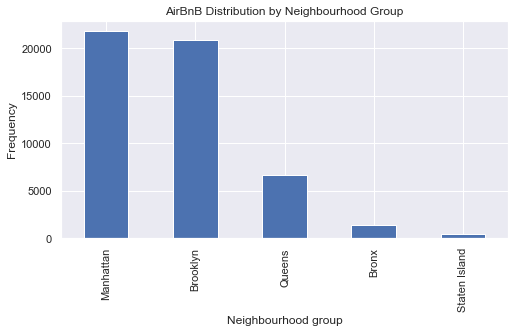

In [19]:
plt.figure(figsize = (8, 4))
house_distr.plot(kind = 'bar', xlabel = 'Neighbourhood group', ylabel = 'Frequency', 
                 title = 'AirBnB Distribution by Neighbourhood Group')

**Manhattan, Brooklyn have the highest listing with Staton island having the lowest**

### Which neighbourhood group is the most expensive and cheapest by average to stay in?

In [20]:
# price groupby neighbourhood group 
neigh_price_avg = round(used_airb.groupby('neighbourhood group')['price'].mean())
neigh_price_avg

neighbourhood group
Bronx            627.0
Brooklyn         625.0
Manhattan        621.0
Queens           628.0
Staten Island    620.0
Name: price, dtype: float64

**The listings are averagely similar, but Bronx have the highest averagewhile Staten Isalnd have the lowest average with a difference of $7 between them.**

### Which neighbourhood group have the most instant bookable listings

In [21]:
pd.crosstab(used_airb['neighbourhood group'], used_airb.instant_bookable, normalize = 'index')

instant_bookable,False,True
neighbourhood group,,
Bronx,0.493585,0.506415
Brooklyn,0.501656,0.498344
Manhattan,0.503647,0.496353
Queens,0.505504,0.494496
Staten Island,0.498929,0.501071


**The instant bookability of the listings are equally split in all neighbourhood**

In [22]:
used_airb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51110 entries, 1 to 102594
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host id                 51110 non-null  object 
 1   host_identity_verified  51110 non-null  object 
 2   neighbourhood group     51099 non-null  object 
 3   neighbourhood           51101 non-null  object 
 4   instant_bookable        51070 non-null  object 
 5   cancellation_policy     51084 non-null  object 
 6   room type               51110 non-null  object 
 7   Construction year       51026 non-null  float64
 8   price                   50980 non-null  float64
 9   minimum nights          50910 non-null  float64
 10  number of reviews       51012 non-null  float64
 11  last review             43193 non-null  object 
 12  availability 365        50881 non-null  float64
 13  house_rules             25253 non-null  object 
dtypes: float64(5), object(9)
memory usage

### Which neighbourhood group has the most recent houses constructed as listings? 

In [23]:
pd.crosstab(used_airb['Construction year'], used_airb['neighbourhood group'])

neighbourhood group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Construction year,,,,,
2003.0,72,1074,1051,326,36
2004.0,82,973,1054,358,33
2005.0,59,1051,1013,332,22
2006.0,66,1000,1114,375,28
2007.0,69,1011,1113,307,26
2008.0,61,1045,1111,346,26
2009.0,57,1047,1120,329,27
2010.0,71,1061,1095,348,25
2011.0,63,1025,1098,327,29


<AxesSubplot:xlabel='Construction year'>

<Figure size 864x360 with 0 Axes>

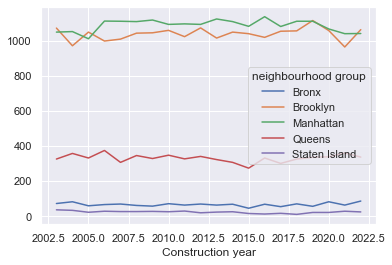

In [24]:
plt.figure(figsize = (12, 5))
pd.crosstab(used_airb['Construction year'], used_airb['neighbourhood group']).plot()

**The number of newly constructed house listings have been relatively the same all the years. There is no unusual increase or decrease in the number of newly constructed houses put for listings**

(array([2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5,
        2020. , 2022.5, 2025. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

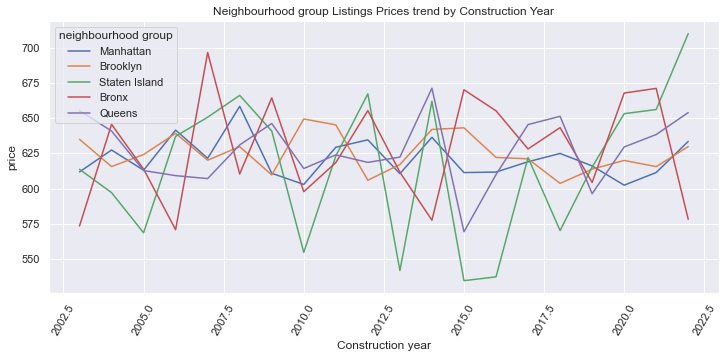

In [25]:
plt.figure(figsize = (12, 5))
sns.lineplot(x='Construction year', y= 'price', hue = 'neighbourhood group', 
             data = used_airb, err_style = None) 
plt.title('Neighbourhood group Listings Prices trend by Construction Year')
plt.xticks(rotation = 60)

In [26]:
used_airb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51110 entries, 1 to 102594
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host id                 51110 non-null  object 
 1   host_identity_verified  51110 non-null  object 
 2   neighbourhood group     51099 non-null  object 
 3   neighbourhood           51101 non-null  object 
 4   instant_bookable        51070 non-null  object 
 5   cancellation_policy     51084 non-null  object 
 6   room type               51110 non-null  object 
 7   Construction year       51026 non-null  float64
 8   price                   50980 non-null  float64
 9   minimum nights          50910 non-null  float64
 10  number of reviews       51012 non-null  float64
 11  last review             43193 non-null  object 
 12  availability 365        50881 non-null  float64
 13  house_rules             25253 non-null  object 
dtypes: float64(5), object(9)
memory usage

In [27]:
used_airb.groupby('neighbourhood group')['number of reviews'].max()

neighbourhood group
Bronx             450.0
Brooklyn          648.0
Manhattan        1024.0
Queens            563.0
Staten Island     333.0
Name: number of reviews, dtype: float64

### What percentage of the house listingis not available for our clients who would want to smoke?

In [28]:
used_airb['house_rules'] = used_airb['house_rules'].str.lower()

<ipython-input-28-74d98a73fc35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_airb['house_rules'] = used_airb['house_rules'].str.lower()


In [29]:
used_airb['house_rules'].str.contains('no smoking').sum()

12636

**About 12636 listings, which is about 25% of the total listings does not allow smoking in the house**

### Which neighbourhood group has the most check in time rules?

In [30]:
used_airb['check_in'] = used_airb['house_rules'].str.contains('check in')

<ipython-input-30-17f5793638d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_airb['check_in'] = used_airb['house_rules'].str.contains('check in')


In [31]:
check_in_rules = used_airb.groupby('neighbourhood group')['check_in'].sum().sort_values(ascending = False)
check_in_rules

neighbourhood group
Manhattan        998
Brooklyn         895
Queens           291
Bronx             54
Staten Island     25
Name: check_in, dtype: int64

<AxesSubplot:title={'center':'Number of check ins by Neighbourhood group'}, ylabel='neighbourhood group'>

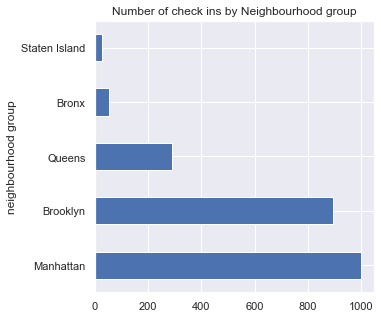

In [32]:
plt.figure(figsize = (5, 5))
check_in_rules.plot(kind = 'barh', title = 'Number of check ins by Neighbourhood group')

**Manhattan, Brooklyn still have the highest number of listings with check ins**

### Which room type is the cheapest to stay in in California?

In [33]:
# price groupby room type 
roomtype_price = round(used_airb.groupby('room type')['price'].mean())
roomtype_price

room type
Entire home/apt    625.0
Hotel room         693.0
Private room       622.0
Shared room        630.0
Name: price, dtype: float64

**Private room is the cheapest to stay as an Hotel room is the costliest tio stay in AirBnB house listings.**

### Are house listings with much expensive compared to the listings with less reviews?

<AxesSubplot:xlabel='price', ylabel='number of reviews'>

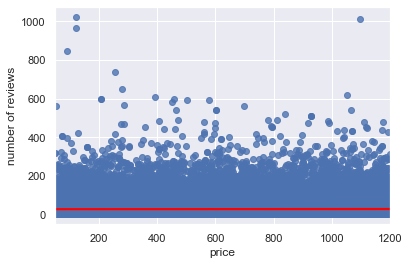

In [34]:
# price vs reviews comparison
sns.regplot(x = 'price', y = 'number of reviews', data = used_airb, line_kws = {'color':'red'})

**The reviews of an house listings is not dependent on the price for the listings**

### Which house listings are the most recently reviewed in California?

In [35]:
used_airb['last review'] = pd.to_datetime(used_airb['last review'])

<ipython-input-35-5201ae78490c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_airb['last review'] = pd.to_datetime(used_airb['last review'])


In [36]:
used_airb[used_airb['last review'].notnull()].sort_values('last review', ascending = False).head(10)

,host id,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,minimum nights,number of reviews,last review,availability 365,house_rules,check_in
483,13746585241,verified,Manhattan,Harlem,False,flexible,Private room,NaN,721.0,2.0,41.0,2040-06-16,47.0,NaN,NaN
318,70084472212,verified,Brooklyn,Greenpoint,True,flexible,Private room,2018.0,920.0,2.0,1.0,2026-03-28,73.0,check-in is 3pm. check-out is 12 noon. in or...,False
1,52335172823,verified,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,142.0,30.0,45.0,2022-05-21,228.0,pet friendly but please confirm with me if the...,False
1099,52770805301,verified,Brooklyn,Bedford-Stuyvesant,True,flexible,Private room,2003.0,170.0,7.0,2.0,2022-05-05,158.0,this is a residential property and quiet is ma...,False
69309,25481131720,verified,Queens,Sunnyside,False,moderate,Private room,2021.0,343.0,3.0,1.0,2022-04-04,330.0,NaN,NaN
1133,13291240388,verified,Queens,Sunnyside,False,flexible,Private room,2021.0,343.0,3.0,1.0,2022-04-04,105.0,please be quiet and respectful of the other re...,False
49689,58154836066,verified,Queens,Woodside,True,strict,Private room,2012.0,755.0,2.0,24.0,2022-03-03,241.0,NaN,NaN
49705,97724863506,verified,Queens,Jamaica,False,flexible,Private room,2010.0,1192.0,1.0,7.0,2022-03-03,338.0,NaN,NaN
49702,81894124227,verified,Brooklyn,Williamsburg,False,moderate,Entire home/apt,2017.0,1021.0,2.0,13.0,2022-03-03,3.0,NaN,NaN
49698,14954303676,verified,Manhattan,Lower East Side,True,strict,Entire home/apt,2011.0,1151.0,1.0,5.0,2022-03-03,162.0,NaN,NaN


### Does house listings with instant bookability get more reviews?

In [37]:
# reviews group by bookability 
used_airb.groupby('instant_bookable')['number of reviews'].mean()

instant_bookable
False    27.044866
True     27.520758
Name: number of reviews, dtype: float64

**Instant bookability of a listing does not influence the number of reviews it can get**

In [38]:
used_airb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51110 entries, 1 to 102594
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   host id                 51110 non-null  object        
 1   host_identity_verified  51110 non-null  object        
 2   neighbourhood group     51099 non-null  object        
 3   neighbourhood           51101 non-null  object        
 4   instant_bookable        51070 non-null  object        
 5   cancellation_policy     51084 non-null  object        
 6   room type               51110 non-null  object        
 7   Construction year       51026 non-null  float64       
 8   price                   50980 non-null  float64       
 9   minimum nights          50910 non-null  float64       
 10  number of reviews       51012 non-null  float64       
 11  last review             43193 non-null  datetime64[ns]
 12  availability 365        50881 non-null  float

In [39]:
used_airb.isnull().sum()

host id                       0
host_identity_verified        0
neighbourhood group          11
neighbourhood                 9
instant_bookable             40
cancellation_policy          26
room type                     0
Construction year            84
price                       130
minimum nights              200
number of reviews            98
last review                7917
availability 365            229
house_rules               25857
check_in                  25857
dtype: int64

In [40]:
used_airb.to_csv('Desktop/airb_clean.csv', index = False)